In [1]:
################################################
##
## plotting subwords
##
################################################

import torch
import numpy as np
import pandas as pd
import sklearn
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt



#######################################################

np.set_printoptions(suppress=True)


#######################################################

In [2]:
ML_raw_data = pd.read_csv('7000ish_ML_metrics_results.csv', index_col=False) 



ML_raw_data.reset_index(drop=True, inplace=True)

In [3]:
the_book = 'The_Great_Gatsby'


result_pd = ML_raw_data[(ML_raw_data.lang == 'English') & (ML_raw_data.book == the_book)] 

result_pd = result_pd[['recall', 'subword','idsubword']]

print(result_pd)

result_pd.to_csv('ForTrainingSubwords7090.csv', sep ='\t')

recalls    = result_pd['recall']
idsubwords = result_pd['idsubword']

print(len(recalls))



        recall subword  idsubword
0     0.726509     NaN        -15
1     0.846194     son         -7
2     0.670341     lið      39045
3     0.732808     573     198938
4     0.538058    ение      17377
...        ...     ...        ...
7085  0.719685     nya        273
7086  0.683465     ιάς      60762
7087  0.736483     ött      13855
7088  0.759580       相       4791
7089  0.628346     pay      21284

[7090 rows x 3 columns]
7090


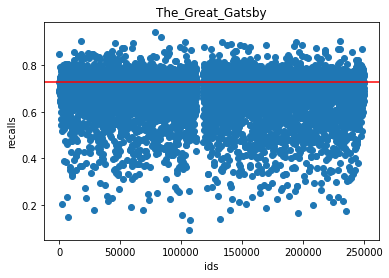

In [4]:

fig = plt.figure()

plt.xlabel("ids")
plt.ylabel("recalls")

plt.scatter(idsubwords, recalls) 
plt.title(the_book)
plt.axhline(y=0.73 , color='r', linestyle='-')
plt.savefig('300dpiGatsby7090.png', dpi=300)
plt.show()

## Sorting

In [5]:
df = result_pd 
df
pd.set_option('display.max_rows', None)
df_sorted = df.sort_values('recall', ascending=False)
df_sorted


,recall,subword,idsubword
5869,0.941732,习近平,79006
6429,0.919160,овдун,83938
4836,0.902887,yev,18117
6800,0.902362,ुद्दीन,230480
5261,0.901312,梅西,194511
283,0.899738,ထြန္း,134021
1433,0.898163,owicz,103396
3225,0.896063,伟,60573
592,0.893963,说道,45994
3368,0.889239,იშვილის,141072


In [6]:
recalls_count    = df_sorted[    df_sorted['recall'] > 0.723 ]
above = len(recalls_count)
print(above)

2397


In [7]:
recalls_count    = df_sorted[    df_sorted['recall'] < 0.723 ]
below = len(recalls_count)
print(below)

4693


In [8]:
x = above / (above + below)
x

0.3380818053596615

In [9]:
recalls_count    = df_sorted[  df['recall'] > 0.78 ]
print(len(recalls_count))

384


/var/folders/q4/zdsjyw0d297_fn6_fh5n7g9h0000gn/T/ipykernel_63979/2306004891.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  recalls_count    = df_sorted[  df['recall'] > 0.78 ]


In [10]:
print(recalls_count)

        recall     subword  idsubword
5869  0.941732         习近平      79006
6429  0.919160       овдун      83938
4836  0.902887         yev      18117
6800  0.902362      ुद्दीन     230480
5261  0.901312          梅西     194511
283   0.899738       ထြန္း     134021
1433  0.898163       owicz     103396
3225  0.896063           伟      60573
592   0.893963          说道      45994
3368  0.889239     იშვილის     141072
5009  0.888189      เอาชนะ     199216
3194  0.887664          息子     138135
6565  0.885564         に対し     169543
3533  0.885564        วรรณ     148183
7070  0.883465        のほうが     193015
5257  0.881365        บุตร     152109
2304  0.879790          夫婦     119143
2989  0.878215          手中      98996
6240  0.877165        ဝင်း     156866
1075  0.874541        රත්න      60093
1328  0.874541           俊      53390
1966  0.874016          夫妇     210449
4049  0.873491          女兒      90027
536   0.871916         ұлы      51217
1653  0.871391     ప్రసాద్     124841
2968  0.8708

In [11]:
recalls_count.to_csv('TopDebiasingSubwords7090.csv')